# Exercise 1 : Crime data

# Hierarchiel Clustering

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [8]:
df=pd.read_csv('D:/Megha/Desktop/DS assignments/Assignment 7 Clustering/crime_data.csv')

In [9]:
import scipy.cluster.hierarchy as sch

In [10]:
df_h=df
df_h

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [11]:
#scale data
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
scaled_df_h=(scaled.fit_transform(df_h.iloc[:,1:]))

In [12]:
scaled_df_h

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [13]:
df_h=pd.DataFrame(scaled_df_h, columns=['Murder','Assault','UrbanPop','Rape'])

In [14]:
df_h

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


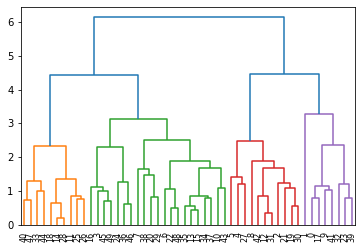

In [15]:
#plot dendrogram
dendrogram=sch.dendrogram(sch.linkage(df_h,method='complete'))

In [16]:
#Agglomerative clustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [17]:
#save clusters for chart
y_hc=hc.fit_predict(df_h)
Clusters=pd.DataFrame(y_hc,columns=['CLusters'])

In [18]:
Clusters.value_counts()

CLusters
0           21
2           11
3           10
1            7
4            1
dtype: int64

In [19]:
y_hc

array([1, 4, 2, 0, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 0, 1, 3, 2, 0, 2,
       0, 1, 0, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 0, 0], dtype=int64)

In [20]:
dfh=df

In [21]:
dfh['Hierarchiel Clusters']=y_hc
dfh

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Hierarchiel Clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


# KMeans Clustering

In [22]:
df_k=df
df_k

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Hierarchiel Clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [23]:
df_k.drop(['Hierarchiel Clusters'],axis=1,inplace=True)

In [24]:
df_k.drop(['Unnamed: 0'],axis=1,inplace=True)

In [25]:
df_k

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [26]:
df_k=scaled.fit_transform(df_k)
df_k

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

C:\Users\Megha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


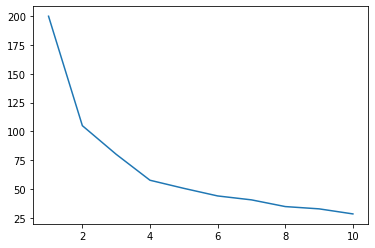

In [27]:
#find number of the optimal seeds
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df_k)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.show()

In [62]:
#optimal points ==> 2 or 3
clusters_new=KMeans(2,random_state=12)
clusters_new.fit(df_k)

KMeans(n_clusters=2, random_state=12)

In [63]:
clusters_new.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [64]:
df_K=df
df_K['KMeans clusters']=clusters_new.labels_

In [65]:
df_K

,Murder,Assault,UrbanPop,Rape,KMeans clusters
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [66]:
clusters_new.cluster_centers_

array([[-0.67675778, -0.68274685, -0.13306084, -0.57037591],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386]])

In [67]:
df_K.groupby('KMeans clusters').agg(['mean']).reset_index()

,KMeans clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.870,114.433333,63.633333,15.943333
1,1,12.165,255.250000,68.400000,29.165000


In [68]:
df_K['KMeans clusters'].value_counts()

0    30
1    20
Name: KMeans clusters, dtype: int64

In [44]:
#try with 4 seeds, optimal seeds have higher variance

In [69]:
clusters_new4=KMeans(4,random_state=12)
clusters_new4.fit(df_k)

KMeans(n_clusters=4, random_state=12)

In [70]:
clusters_new4.labels_

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 2, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3])

In [71]:
df_K=df
df_K['KMeans clusters']=clusters_new4.labels_
df_K

,Murder,Assault,UrbanPop,Rape,KMeans clusters
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,3
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,1


In [72]:
clusters_new4.cluster_centers_

array([[-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024]])

In [73]:
df_K.groupby('KMeans clusters').agg(['mean']).reset_index()

,KMeans clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,13.937500,243.625000,53.750000,21.412500
2,2,10.815385,257.384615,76.000000,33.192308
3,3,5.656250,138.875000,73.875000,18.781250


In [74]:
#2 seeds have more vairance; so optimal number of seeds=2

In [75]:
df_K['KMeans clusters'].value_counts()

3    16
0    13
2    13
1     8
Name: KMeans clusters, dtype: int64

# DBScan Clustering

In [90]:
df_db=df
df_db

,Murder,Assault,UrbanPop,Rape,KMeans clusters
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,3
7,5.9,238,72,15.8,3
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,1


In [91]:
df_db.drop(['KMeans clusters','Kmeans clusters'],axis=1,inplace=True)

KeyError: "['Kmeans clusters'] not found in axis"

In [ ]:
df_db

In [ ]:
array=df_db.values
array

df_db_sc=scaled.fit_transform(array)
df_db_sc

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [89]:
dbs=DBSCAN(eps=0.9,min_samples=6)
dbs.fit(df_db_sc)

DBSCAN(eps=0.9, min_samples=6)

In [ ]:
dbs.labels_

In [ ]:
df_db['Cluster']=pd.DataFrame(dbs.labels_)
df_db

In [ ]:
metrics.silhouette_score(df_db_sc,dbs.labels_)
metrics.silhouette_score

In [83]:
metrics.silhouette_score(df_db_sc,dbs.labels_)

NameError: name 'df_db_sc' is not defined

In [81]:
#% outliers
23/50

0.46

In [89]:
df_db.Cluster.value_counts()

-1    31
 0    19
Name: Cluster, dtype: int64

In [91]:
df_db.groupby('Cluster').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Cluster,,,,
-1,9.629032,213.354839,68.548387,25.196774
0,4.784211,101.263158,60.631579,14.763158
